In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
weather_data = pd.read_csv('weather_features.csv')

In [220]:
# only use data from Madrid
weather_data = weather_data[weather_data['city_name']=='Madrid']

In [221]:
weather_data.index = pd.to_datetime(weather_data['dt_iso'])

In [222]:
#drop columns that are not needed
weather_data.drop(columns=['dt_iso', 'city_name', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'wind_deg'], inplace=True)

In [223]:
# for categorical columns show value counts
for col in weather_data.columns:
    if weather_data[col].dtype == 'object':
        print(col, weather_data[col].nunique())

weather_main 9
weather_description 32
weather_icon 23


In [224]:
# since weather_description and weather_icon have a lot of unique values, drop them
weather_data.drop(columns=['weather_icon', 'weather_description', 'weather_id'], inplace=True)

In [225]:
energy_data = pd.read_csv('energy_dataset.csv')

In [226]:
energy_data.index = pd.to_datetime(energy_data['time'])
# drop columns that are not needed
energy_data.drop(columns=['time', "generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"], inplace=True)

In [227]:
energy_data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [228]:
energy_data.dropna(inplace=True)

In [229]:
# sum all the generation types to get the total generation
energy_data['total_generation'] = energy_data[energy_data.columns[:20]].sum(axis=1)

In [230]:
energy_data.drop(columns=energy_data.columns[:20], inplace=True)

In [231]:
energy_data.columns

Index(['forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'total_generation'],
      dtype='object')

In [232]:
forecast_columns = [col for col in energy_data.columns if 'forecast' in col]
energy_data.drop(columns=forecast_columns, inplace=True)
energy_data.drop(columns=['price day ahead'], inplace=True)

In [248]:
merged_data = pd.merge(energy_data, weather_data, how='inner', left_index=True, right_index=True)
merged_data.index = pd.to_datetime(merged_data.index, utc=True)

In [249]:
merged_data.head()

,total load actual,price actual,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,weather_main
2014-12-31 23:00:00+00:00,25385.0,65.41,28251.0,267.325,267.325,267.325,971,63,1,clear
2015-01-01 00:00:00+00:00,24382.0,64.92,27818.0,267.325,267.325,267.325,971,63,1,clear
2015-01-01 01:00:00+00:00,22734.0,64.48,26796.0,266.186,266.186,266.186,971,64,1,clear
2015-01-01 02:00:00+00:00,21286.0,59.32,25223.0,266.186,266.186,266.186,971,64,1,clear
2015-01-01 03:00:00+00:00,20264.0,56.04,24620.0,266.186,266.186,266.186,971,64,1,clear


In [250]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36220 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total load actual  36220 non-null  float64
 1   price actual       36220 non-null  float64
 2   total_generation   36220 non-null  float64
 3   temp               36220 non-null  float64
 4   temp_min           36220 non-null  float64
 5   temp_max           36220 non-null  float64
 6   pressure           36220 non-null  int64  
 7   humidity           36220 non-null  int64  
 8   wind_speed         36220 non-null  int64  
 9   weather_main       36220 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 3.0+ MB


total load actual


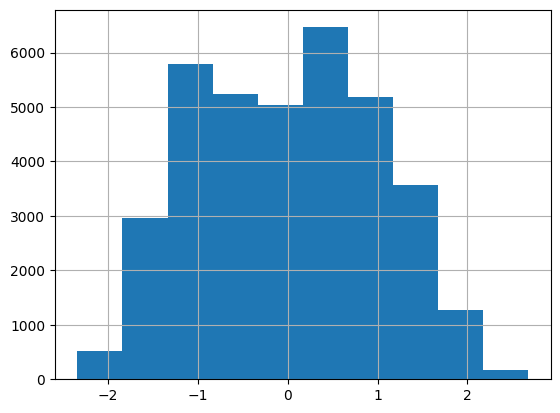

price actual


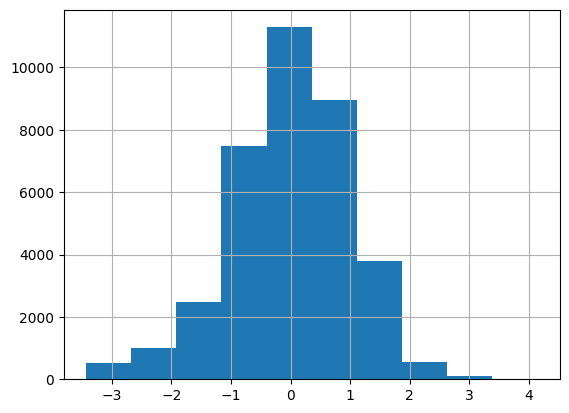

total_generation


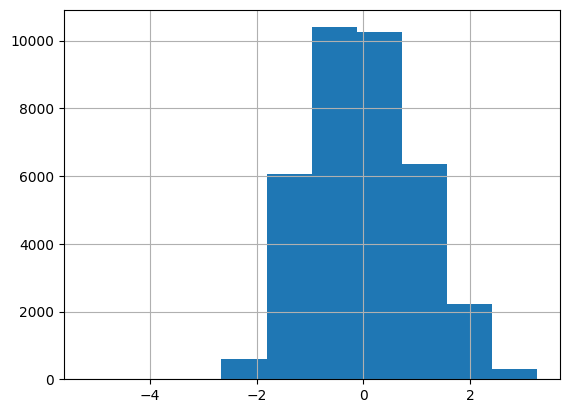

temp


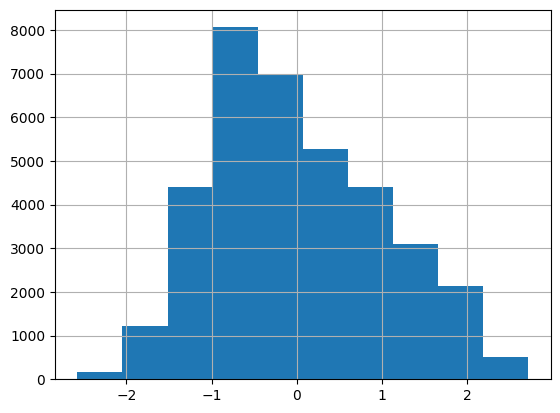

temp_min


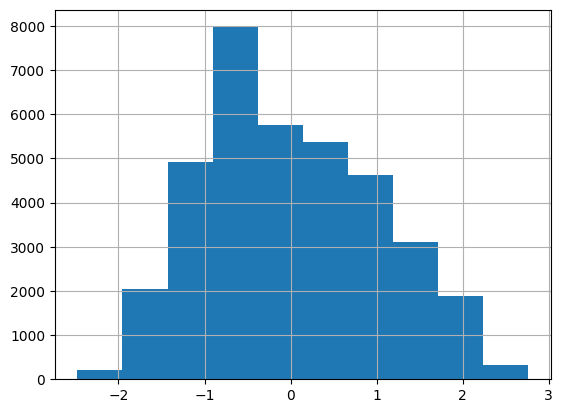

temp_max


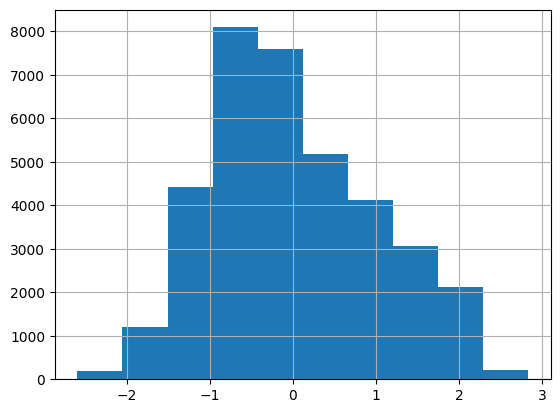

pressure


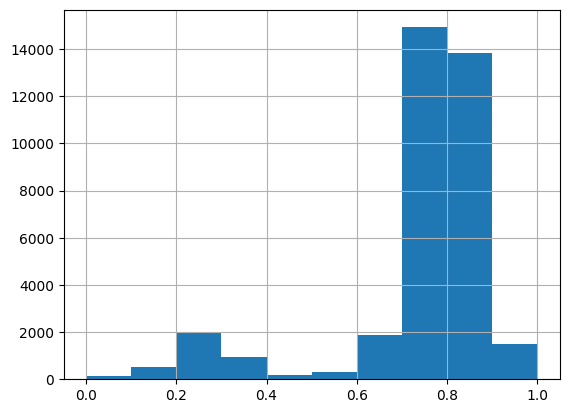

humidity


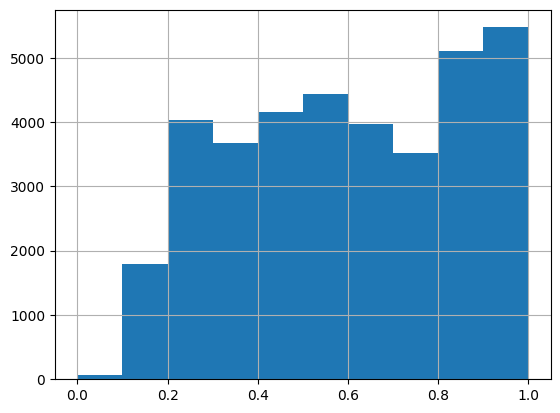

wind_speed


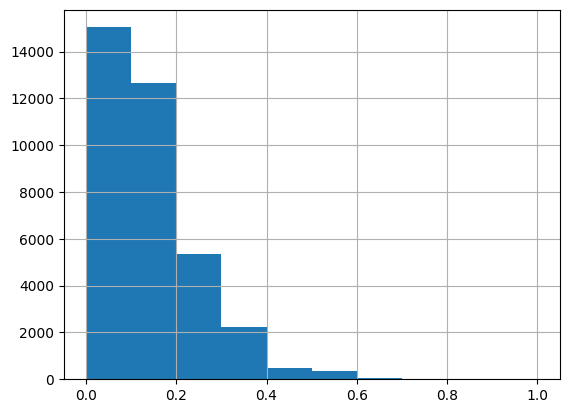

weather_main


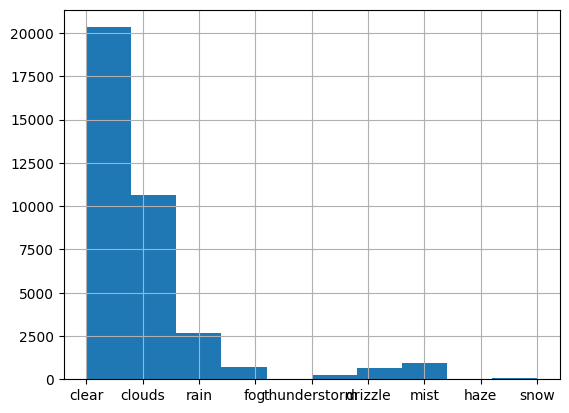

In [255]:
# plot histogram of each column
for col in merged_data.columns:
    print(col)
    merged_data[col].hist()
    plt.show()

In [252]:
columns_scale_std = ["total load actual", "price actual", "total_generation", 'temp', 'temp_min', 'temp_max']
columns_scale_min_max = ['pressure', 'humidity', 'wind_speed']

In [253]:
merged_data[columns_scale_std] = (merged_data[columns_scale_std] - merged_data[columns_scale_std].mean()) / merged_data[columns_scale_std].std()

In [254]:
merged_data[columns_scale_min_max] = (merged_data[columns_scale_min_max] - merged_data[columns_scale_min_max].min()) / (merged_data[columns_scale_min_max].max() - merged_data[columns_scale_min_max].min())

In [256]:
# get dummy variables for weather_main
merged_data = pd.get_dummies(merged_data, columns=['weather_main'])

In [257]:
merged_data

,total load actual,price actual,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,weather_main_clear,weather_main_clouds,weather_main_drizzle,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_snow,weather_main_thunderstorm
2014-12-31 23:00:00+00:00,-0.735010,0.519210,-0.101986,-2.230399,-2.129082,-2.263250,0.382609,0.63,0.055556,True,False,False,False,False,False,False,False,False
2015-01-01 00:00:00+00:00,-0.953921,0.484673,-0.205237,-2.230399,-2.129082,-2.263250,0.382609,0.63,0.055556,True,False,False,False,False,False,False,False,False
2015-01-01 01:00:00+00:00,-1.313608,0.453660,-0.448936,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,True,False,False,False,False,False,False,False,False
2015-01-01 02:00:00+00:00,-1.629644,0.089967,-0.824024,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,True,False,False,False,False,False,False,False,False
2015-01-01 03:00:00+00:00,-1.852702,-0.141218,-0.967812,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,0.414766,1.337520,-0.539787,-0.484634,-0.510832,-0.415833,0.895652,0.88,0.055556,True,False,False,False,False,False,False,False,False
2018-12-31 19:00:00+00:00,0.214407,1.276904,-0.826409,-0.854541,-0.947459,-0.830401,0.904348,0.52,0.055556,True,False,False,False,False,False,False,False,False
2018-12-31 20:00:00+00:00,-0.148772,1.145806,-1.118753,-1.066377,-0.947459,-1.141326,0.895652,0.65,0.055556,True,False,False,False,False,False,False,False,False
2018-12-31 21:00:00+00:00,-0.644215,0.834974,-1.414198,-1.236276,-1.165773,-1.244968,0.904348,0.69,0.111111,True,False,False,False,False,False,False,False,False


In [258]:
# add time features
merged_data['hour'] = merged_data.index.hour
merged_data['day_of_week'] = merged_data.index.dayofweek
merged_data['day_of_month'] = merged_data.index.day
merged_data['month'] = merged_data.index.month
merged_data['day_of_year'] = merged_data.index.year

In [259]:
# get time encodings, as sine and cosine
merged_data['hour_sin'] = np.sin(merged_data['hour']*(2.*np.pi/24))
merged_data['hour_cos'] = np.cos(merged_data['hour']*(2.*np.pi/24))
merged_data['day_of_week_sin'] = np.sin(merged_data['day_of_week']*(2.*np.pi/7))
merged_data['day_of_week_cos'] = np.cos(merged_data['day_of_week']*(2.*np.pi/7))
merged_data['day_of_month_sin'] = np.sin(merged_data['day_of_month']*(2.*np.pi/30))
merged_data['day_of_month_cos'] = np.cos(merged_data['day_of_month']*(2.*np.pi/30))
merged_data['month_sin'] = np.sin((merged_data['month']-1)*(2.*np.pi/12))
merged_data['month_cos'] = np.cos((merged_data['month']-1)*(2.*np.pi/12))
merged_data['day_of_year_sin'] = np.sin((merged_data['day_of_year']-1)*(2.*np.pi/365))
merged_data['day_of_year_cos'] = np.cos((merged_data['day_of_year']-1)*(2.*np.pi/365))

In [262]:
merged_data.drop(columns=['hour', 'day_of_week', 'day_of_month', 'month', 'day_of_year'], inplace=True)

In [266]:
merged_data.head()

,total load actual,price actual,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,weather_main_clear,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos
2014-12-31 23:00:00+00:00,-0.735010,0.519210,-0.101986,-2.230399,-2.129082,-2.263250,0.382609,0.63,0.055556,True,...,-0.258819,0.965926,0.974928,-0.222521,0.207912,0.978148,-0.5,0.866025,-0.094537,-0.995521
2015-01-01 00:00:00+00:00,-0.953921,0.484673,-0.205237,-2.230399,-2.129082,-2.263250,0.382609,0.63,0.055556,True,...,0.000000,1.000000,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
2015-01-01 01:00:00+00:00,-1.313608,0.453660,-0.448936,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,True,...,0.258819,0.965926,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
2015-01-01 02:00:00+00:00,-1.629644,0.089967,-0.824024,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,True,...,0.500000,0.866025,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
2015-01-01 03:00:00+00:00,-1.852702,-0.141218,-0.967812,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,True,...,0.707107,0.707107,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747


In [272]:
merged_data.to_csv('merged_data.csv', index_label='time')

In [273]:
df = pd.read_csv('merged_data.csv')

In [274]:
df.index = pd.to_datetime(df['time'])

In [275]:
df

,time,total load actual,price actual,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,-0.735010,0.519210,-0.101986,-2.230399,-2.129082,-2.263250,0.382609,0.63,0.055556,...,-0.258819,9.659258e-01,0.974928,-0.222521,0.207912,0.978148,-0.5,0.866025,-0.094537,-0.995521
2015-01-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,-0.953921,0.484673,-0.205237,-2.230399,-2.129082,-2.263250,0.382609,0.63,0.055556,...,0.000000,1.000000e+00,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
2015-01-01 01:00:00+00:00,2015-01-01 01:00:00+00:00,-1.313608,0.453660,-0.448936,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,...,0.258819,9.659258e-01,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
2015-01-01 02:00:00+00:00,2015-01-01 02:00:00+00:00,-1.629644,0.089967,-0.824024,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,...,0.500000,8.660254e-01,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
2015-01-01 03:00:00+00:00,2015-01-01 03:00:00+00:00,-1.852702,-0.141218,-0.967812,-2.352877,-2.253411,-2.381298,0.382609,0.64,0.055556,...,0.707107,7.071068e-01,0.433884,-0.900969,0.207912,0.978148,0.0,1.000000,-0.111659,-0.993747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,2018-12-31 18:00:00+00:00,0.414766,1.337520,-0.539787,-0.484634,-0.510832,-0.415833,0.895652,0.88,0.055556,...,-1.000000,-1.836970e-16,0.000000,1.000000,0.207912,0.978148,-0.5,0.866025,-0.162807,-0.986658
2018-12-31 19:00:00+00:00,2018-12-31 19:00:00+00:00,0.214407,1.276904,-0.826409,-0.854541,-0.947459,-0.830401,0.904348,0.52,0.055556,...,-0.965926,2.588190e-01,0.000000,1.000000,0.207912,0.978148,-0.5,0.866025,-0.162807,-0.986658
2018-12-31 20:00:00+00:00,2018-12-31 20:00:00+00:00,-0.148772,1.145806,-1.118753,-1.066377,-0.947459,-1.141326,0.895652,0.65,0.055556,...,-0.866025,5.000000e-01,0.000000,1.000000,0.207912,0.978148,-0.5,0.866025,-0.162807,-0.986658
